In [208]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Classifier Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np 
import pickle

In [209]:
DATASET_PATH = r'Crop_recommendation.csv'

In [210]:
dataset = pd.read_csv(DATASET_PATH)

In [211]:
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [212]:
dataset = dataset.drop(columns = ['N','P','K'])

In [213]:
set(dataset.label)

{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon'}

In [214]:
dataset.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


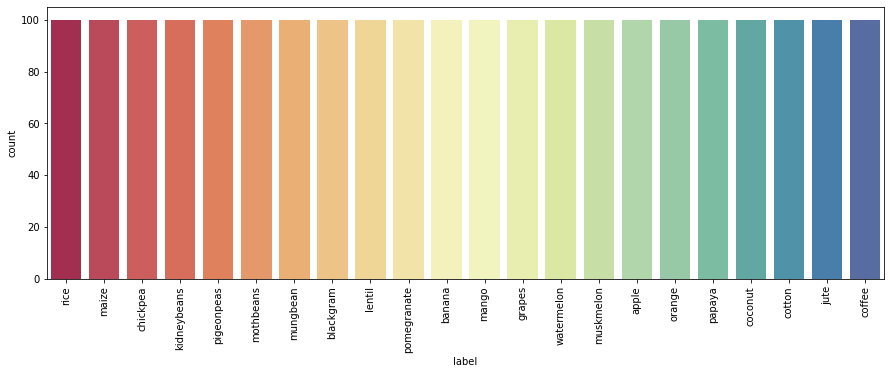

In [215]:
f= plt.figure(figsize=(15,5))
sns.countplot(dataset['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [216]:
X = dataset.drop(['label'], axis=1).values
Y = dataset['label'].values

In [217]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**SVM Classifier **

---



In [218]:
svm_classifier = svm.SVC(kernel='linear') # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [219]:
svm_model = svm_classifier.fit(X_Train,Y_Train)

In [220]:
svm_accuracy = svm_model.score(X_Test,Y_Test)
svm_accuracy

0.8909090909090909

**Logistic Regression Classifier **

---



In [221]:
logestic_regression_classifier = LogisticRegression()

In [222]:
logestic_regression_model = logestic_regression_classifier.fit(X_Train,Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [223]:
lr_accuracy = logestic_regression_model.score(X_Test,Y_Test)
lr_accuracy

0.5818181818181818

**Decision Tree Classifier **

---



In [224]:
decision_tree_classifier = DecisionTreeClassifier()

In [225]:
decision_tree_model = decision_tree_classifier.fit(X_Train,Y_Train)

In [226]:
dt_accuracy = decision_tree_model.score(X_Test,Y_Test)
dt_accuracy

0.9295454545454546

**Random Forest Classifier **

---



In [227]:
random_forest_model = RandomForestClassifier()

In [228]:
random_forest_model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [229]:
rf_accuracy = random_forest_model.score(X_Test,Y_Test)
rf_accuracy

0.9659090909090909

**Comparison Between Algorithms **

---



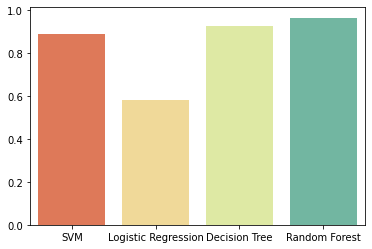

In [230]:
sns.barplot(x = ["SVM","Logistic Regression","Decision Tree","Random Forest"] , y = [svm_accuracy,lr_accuracy,dt_accuracy,rf_accuracy] ,palette ='Spectral')

**Predictions Between Algorithms **

---



In [231]:
def predict(model,temperature, humidity,ph,rainfal):
    try:
        return model.predict_proba([[temperature,humidity,ph,rainfal]])
    except:
        print("Error in prediction process")
        return False

In [232]:
def prediction_as_list(model , prediction):
    j = 0
    result = []
    for i in prediction[0]:
        result.append({
            "crop_name": model.classes_[j] ,
            "precentage": int(i * 100) 
        })
        j+=1
    return result

In [233]:
prediction_as_list( random_forest_model , predict(random_forest_model,27.35,55.99,7.13,148) )

[{'crop_name': 'apple', 'precentage': 0},
 {'crop_name': 'banana', 'precentage': 0},
 {'crop_name': 'blackgram', 'precentage': 0},
 {'crop_name': 'chickpea', 'precentage': 0},
 {'crop_name': 'coconut', 'precentage': 0},
 {'crop_name': 'coffee', 'precentage': 95},
 {'crop_name': 'cotton', 'precentage': 0},
 {'crop_name': 'grapes', 'precentage': 0},
 {'crop_name': 'jute', 'precentage': 0},
 {'crop_name': 'kidneybeans', 'precentage': 0},
 {'crop_name': 'lentil', 'precentage': 0},
 {'crop_name': 'maize', 'precentage': 0},
 {'crop_name': 'mango', 'precentage': 0},
 {'crop_name': 'mothbeans', 'precentage': 0},
 {'crop_name': 'mungbean', 'precentage': 0},
 {'crop_name': 'muskmelon', 'precentage': 0},
 {'crop_name': 'orange', 'precentage': 0},
 {'crop_name': 'papaya', 'precentage': 0},
 {'crop_name': 'pigeonpeas', 'precentage': 5},
 {'crop_name': 'pomegranate', 'precentage': 0},
 {'crop_name': 'rice', 'precentage': 0},
 {'crop_name': 'watermelon', 'precentage': 0}]

In [234]:
pickle.dump(random_forest_model, open("crop_suggestion_model.sav", 'wb'))